# P9120 HW3

## Q1

**(a)** (Logistic Regression)

We want to find $f^*(x)$ such that

$$f^*(x) = argmin_{f}E_{XY}(L(Y, f(X))) \\
= argmin_{f(x)}E_{Y|x}[log(1+e^{-yf(x)})]$$

We take the first derivative of the above equation with respect to $f(x)$, set the resulting expression equal to zero and solve for $f(x)$:

$$
\frac{\partial E_{Y|x}L(Y, f(x))}{\partial f(x)}\\
= E_{Y|x}(\frac{\partial L(Y, f(x))}{\partial f(x)})\\
= E_{Y|x}[\frac{\partial}{\partial f(x)}log(1+e^{-Yf(x)})]\\
= E_{Y|x}(\frac{-Ye^{-Yf(x)}}{1+e^{-Yf(x)}}) = 0
$$

Now evaluating the above expectation with $Y = \pm 1$:

$$Pr(Y = -1|x)[\frac{e^{f(x)}}{1+e^{f(x)}}] + Pr(Y = 1|x)[\frac{-e^{-f(x)}}{1+e^{-f(x)}}]\\
= Pr(Y = -1|x)[\frac{e^{f(x)}}{1+e^{f(x)}}] - Pr(Y = 1|x)[\frac{1}{1+e^{f(x)}}] = 0
$$

Solve the above equation for $f(x)$

$$\frac{Pr(Y = 1|x)}{Pr(Y = -1|x)}
=e^{f(x)}\\
f^*(x) = log\frac{Pr(Y = 1|X=x)}{Pr(Y = -1|X=x)}$$

**(b)** (SVM)

We want to find $f^*(x)$ such that

$$f^*(x) = argmin_{f}E_{XY}(L(Y, f(X))) \\
= argmin_{f(x)}E_{Y|x}[1-yf(x)]_+$$


We take the first derivative of the above equation with respect to $f(x)$

$$
\frac{\partial E_{Y|x}L(Y, f(x))}{\partial f(x)}\\
= E_{Y|x}(\frac{\partial L(Y, f(x))}{\partial f(x)})\\
= E_{Y|x}(sign(-Y))_+ = E_{Y|x}max(sign(-Y), 0) = 0
$$

Evaluating the $E_{Y|x}(-Y) = 0$ with $Y = \pm 1$:

$$Pr(Y = -1|x) - Pr(Y = 1|x) = 0\\
1 - 2Pr(Y = 1|x) = 0\\
Pr(Y=1|x)-\frac{1}{2} = 0
$$

Therefore $f^*(x) = sign(Pr(Y=1|X=x)-\frac{1}{2})$

**(c)** (Regression)

We want to find $f^*(x)$ such that

$$f^*(x) = argmin_{f}E_{XY}(L(Y, f(X))) \\
= argmin_{f(x)}E_{Y|x}[y-f(x)]^2$$


We take the first derivative of the above equation with respect to $f(x)$

$$
\frac{\partial E_{Y|x}L(Y, f(x))}{\partial f(x)}\\
= E_{Y|x}(\frac{\partial L(Y, f(x))}{\partial f(x)})\\
= E_{Y|x}[-2y+2f(x)] = 0
$$

Evaluating the above equation with $Y = \pm 1$:

$$Pr(Y = -1|X=x)[2+2f(x)] + Pr(Y = 1|X=x)[2f(x)-2] = 0\\
f(x)[Pr(Y=-1|X=x)+Pr(Y=1|X=x)] = Pr(Y=1|X=x)-Pr(Y=-1|X=x)\\
f(x) = 2Pr(Y=1|X=x) - 1
$$

Therefore $f^*(x) = 2Pr(Y=1|X=x) - 1$

**(d)** (Adaboost)

We want to find $f^*(x)$ such that

$$f^*(x) = argmin_{f}E_{XY}(L(Y, f(X))) \\
= argmin_{f(x)}E_{Y|x}[e^{-yf(x)}]$$

We take the first derivative of the above equation with respect to $f(x)$, set the resulting expression equal to zero and solve for $f(x)$:

$$
\frac{\partial E_{Y|x}L(Y, f(x))}{\partial f(x)}\\
= E_{Y|x}(\frac{\partial L(Y, f(x))}{\partial f(x)})\\
= E_{Y|x}(-Ye^{-Yf(x)}) = 0
$$

Now evaluating the above expectation with $Y = \pm 1$:

$$Pr(Y = -1|x)(e^{f(x)}) + Pr(Y = 1|x)(-e^{-f(x)}) = 0\\
e^{2f(x)}Pr(Y=-1|x) - Pr(Y=1|x)= 0\\
e^{2f(x)} = \frac{Pr(Y=1|x)}{Pr(Y=-1|x)}
$$

Solve the above equation for $f(x)$

$$f^*(x) = \frac{1}{2}log\frac{Pr(Y = 1|X=x)}{Pr(Y = -1|X=x)}$$

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import RocCurveDisplay

from numpy.random import seed
seed(2022)
tf.random.set_seed(2)

## Q2

**Ex 10.4**

The features $X_1,...,X_{10}$ are standard independent Gaussian, and the deterministic target $Y$ is defined by

$$Y =
\begin{cases}
1 \text{   if } \sum^{10}_{j=1}X^2_{j}>\chi^2_{10}(0.5)\\
-1 \text{   otherwise.}
\end{cases}$$

Here $\chi^2_{10}(0.5) = 9.34$ is the median of a chi-squared random variable with 10 degrees of freedom

**(b) Redo the computations for the example of Figure 10.2. Plot the training error as well as test error, and discuss its behavior.**

In [2]:
# test = 2000
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=2022)

Split the training and testing set, train the single stump

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err_train = 1.0 - dt_stump.score(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)
dt.fit(X_train, y_train)
dt_err_train = 1.0 - dt.score(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

In [4]:
print(dt.tree_.node_count)

249


The decision tree we got has 249 total number of nodes, similar to the text book example

**Adaboost with real SAMME.R**

We now set the hyperparameters for our AdaBoost classifiers, and define the real AdaBoost classifier
and fit it to the training set.

In [5]:
N_ESTIMATORS = 400
LR = 1.0

In [6]:
ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=LR,
    n_estimators=N_ESTIMATORS,
    algorithm="SAMME.R",
)
ada_real.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

**Compute test errors**

In [7]:
ada_real_err_train = np.zeros((N_ESTIMATORS,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((N_ESTIMATORS,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

**Plot the figure**

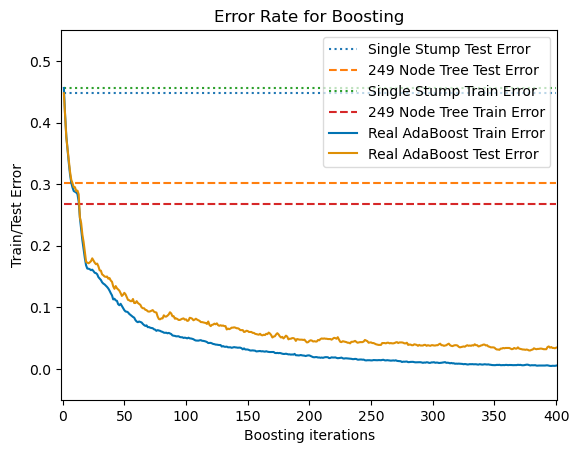

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

colors = sns.color_palette("colorblind")

ax.plot([1, N_ESTIMATORS], [dt_stump_err] * 2, ":", 
        label="Single Stump Test Error")
ax.plot([1, N_ESTIMATORS], [dt_err] * 2, "--", 
        label="249 Node Tree Test Error")

ax.plot([1, N_ESTIMATORS], [dt_stump_err_train] * 2, ":", 
        label="Single Stump Train Error")
ax.plot([1, N_ESTIMATORS], [dt_err_train] * 2, "--", 
        label="249 Node Tree Train Error")


ax.plot(
    np.arange(N_ESTIMATORS) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[0],
)

ax.plot(
    np.arange(N_ESTIMATORS) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[1],
)

ax.set_ylim((-0.05, 0.55))
ax.set_xlim((-1, 401))
ax.set_xlabel("Boosting iterations")
ax.set_ylabel("Train/Test Error")
ax.set_title("Error Rate for Boosting")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [9]:
print("The training error for Adaboost after 400 iterations is %.3f \n\
The testing error for Adaboost after 400 iterations is %.3f \n\
The training error for single stump is %.3f \n\
The testing error for single stump is %.3f \n\
The training error for 249 Node decision tree is %.3f \n\
The testing error for 249 Node decision tree is %.3f" % 
(ada_real_err_train[-1], ada_real_err[-1], 
 dt_stump_err_train, dt_stump_err,
 dt_err_train, dt_err))

The training error for Adaboost after 400 iterations is 0.005 
The testing error for Adaboost after 400 iterations is 0.034 
The training error for single stump is 0.456 
The testing error for single stump is 0.448 
The training error for 249 Node decision tree is 0.268 
The testing error for 249 Node decision tree is 0.301


* Applying the single binary classification tree (single stump) gives a very poor test set error rate (~0.45), compared to 50% for a random classifier.

* However, as we increase the boosting iterations, the error rate steadily decreases, reaching 0.5% on training set after 400 iterations, and 3.4% on testing set after 400 iterations.

* Adaboost also quickly outperforms a single large classification tree (eror rate 30%)

**(c) Investigate the number of iterations needed to make the test error finally start to rise.**

In [10]:
N_ESTIMATORS = 10000

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=LR,
    n_estimators=N_ESTIMATORS,
    algorithm="SAMME.R",
)
ada_real.fit(X_train, y_train)

ada_real_err = np.zeros((N_ESTIMATORS,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

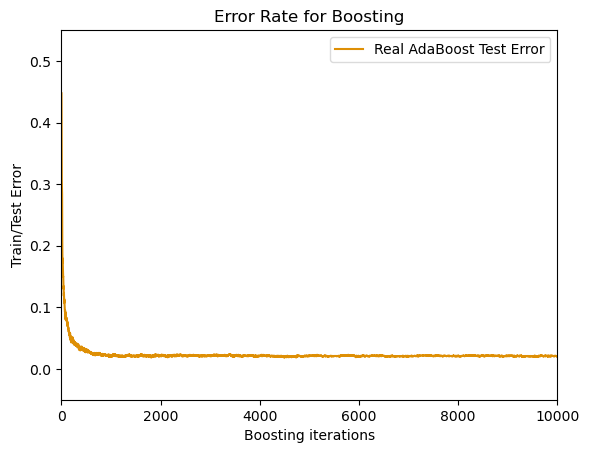

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.arange(N_ESTIMATORS) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[1],
)

ax.set_ylim((-0.05, 0.55))
ax.set_xlim((-1, 10001))
ax.set_xlabel("Boosting iterations")
ax.set_ylabel("Train/Test Error")
ax.set_title("Error Rate for Boosting")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [12]:
ada_real_err[-1]

0.020499999999999963

The test error was steady at 0.02 and I did not observe a rise. However, we could have observe the rise if we look at the margin of confidence. 

**(d) Change the setup of this example as follows: define two classes, with the features in Class 1 being $X_1, X_2, ... X_{10}$, standard independent Gaussian variates. In Class 2, the features $X_1, X_2, ... X_{10}$, are also standard independent Gaussian, but conditioned on the event $\sum_{j}X_j^2 > 12$. Now the classes have significant overlap in feature space. Repeat the AdaBoost experiments as in Figure 10.2 and discuss the results.**

In [13]:
X_1 = np.empty([6000, 10])
y_1 = np.ones(6000)
i = 0
while i < 5999:
    X_temp, _ = datasets.make_hastie_10_2(n_samples=1)
    if np.sum(X_temp ** 2) > 12:
        X_1[i] = X_temp
        i += 1


X_0, _ = datasets.make_hastie_10_2(n_samples=6000, random_state=1)
y_0 = np.negative(y_1)

In [14]:
X = np.concatenate((X_0, X_1))
y = np.concatenate((y_0, y_1))

Repeat the experiment:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err_train = 1.0 - dt_stump.score(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)
dt.fit(X_train, y_train)
dt_err_train = 1.0 - dt.score(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

In [18]:
print(dt.tree_.node_count)

247


In [19]:
N_ESTIMATORS = 400
LR = 1.0
ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=LR,
    n_estimators=N_ESTIMATORS,
    algorithm="SAMME.R",
)
ada_real.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [20]:
ada_real_err_train = np.zeros((N_ESTIMATORS,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((N_ESTIMATORS,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

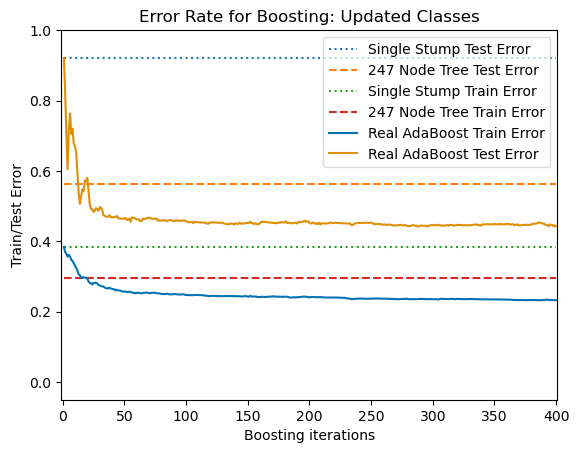

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

colors = sns.color_palette("colorblind")

ax.plot([1, N_ESTIMATORS], [dt_stump_err] * 2, ":", 
        label="Single Stump Test Error")
ax.plot([1, N_ESTIMATORS], [dt_err] * 2, "--", 
        label="247 Node Tree Test Error")

ax.plot([1, N_ESTIMATORS], [dt_stump_err_train] * 2, ":", 
        label="Single Stump Train Error")
ax.plot([1, N_ESTIMATORS], [dt_err_train] * 2, "--", 
        label="247 Node Tree Train Error")


ax.plot(
    np.arange(N_ESTIMATORS) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[0],
)

ax.plot(
    np.arange(N_ESTIMATORS) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[1],
)

ax.set_ylim((-0.05, 1))
ax.set_xlim((-1, 401))
ax.set_xlabel("Boosting iterations")
ax.set_ylabel("Train/Test Error")
ax.set_title("Error Rate for Boosting: Updated Classes")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [22]:
print("The training error for Adaboost after 400 iterations is %.3f \n\
The testing error for Adaboost after 400 iterations is %.3f \n\
The training error for single stump is %.3f \n\
The testing error for single stump is %.3f \n\
The training error for 245 Node decision tree is %.3f \n\
The testing error for 245 Node decision tree is %.3f" % 
(ada_real_err_train[-1], ada_real_err[-1], 
 dt_stump_err_train, dt_stump_err,
 dt_err_train, dt_err))

The training error for Adaboost after 400 iterations is 0.233 
The testing error for Adaboost after 400 iterations is 0.443 
The training error for single stump is 0.384 
The testing error for single stump is 0.920 
The training error for 245 Node decision tree is 0.295 
The testing error for 245 Node decision tree is 0.564


* Applying the single binary classification tree (single stump) gives a even poorer test set error rate (~0.910), compared to 50% for a random classifier. The single large classification tree also gives a poor test set error rate (0.643). This means they are not good at differentiating classes when they are too similiar

* As we increase the boosting iterations, the error rate steadily decreases, reaching 23% on training set after 400 iterations, and 42% on testing set after 400 iterations. The performance is much poorer than the previous example, but still better than the other two.

* The poor performance may due the fact that the AdaBoost is very sensitive to noise. It is fitting a classification model (an additive model) to an exponential loss function. The exponential loss function is sensitive to outliers/label noise since the penalty is exponentiated and wrong labeled data would suffer a large loss/penalty if it is deeply inside the other class.

## Q3

The “spam” data” ( https://web.stanford.edu/hastie/ElemStatLearn/data) has been divided into a training set and a test set. Fit a neural network to the training set, and calculate its classification error on the test set. Compare your results to the classification tree results presented in Section 9.2.5 of [ESL] on both the classification performance and interpretability of the final model.

In [23]:
## Read in data
X_train = pd.read_csv("X_train.csv", header = 0, index_col = 0)
X_train = X_train.reset_index(drop=True)
y_train = pd.read_csv("y_train.csv", header = 0, index_col = 0)
y_train = y_train.reset_index(drop=True)

X_test = pd.read_csv("X_test.csv", header = 0, index_col = 0)
X_test = X_test.reset_index(drop=True)
y_test = pd.read_csv("y_test.csv", header = 0, index_col = 0)
y_test = y_test.reset_index(drop=True)

**Use Keras to build a sequential model of 3 hidden layers, 2 dropout layers**

Taking 20% data out as our validation set

In [24]:
# validation set
X_train_, X_val = train_test_split(X_train, test_size=0.2, random_state = 42)
y_train_, y_val = train_test_split(y_train, test_size=0.2, random_state = 42)

In [25]:
# create model
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.AUC(name='auc')
]

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
]);
    
# Compile model
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), 
              loss = keras.losses.BinaryCrossentropy(), 
              metrics=METRICS)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14848     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

2022-11-08 20:50:02.738476: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
EPOCHS = 100
BATCH_SIZE = 40

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='auc', 
    verbose=2,
    patience=20,
    mode='max',
    restore_best_weights=True)

history = model.fit(
    X_train_, 
    y_train_, 
    epochs=200, 
    validation_split=0.20,
    callbacks=[early_stopping],
    batch_size=40, 
    verbose=0, 
    validation_data=(X_val, y_val)
)

2022-11-08 20:50:06.942525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


In [27]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.1754


**History Checking**

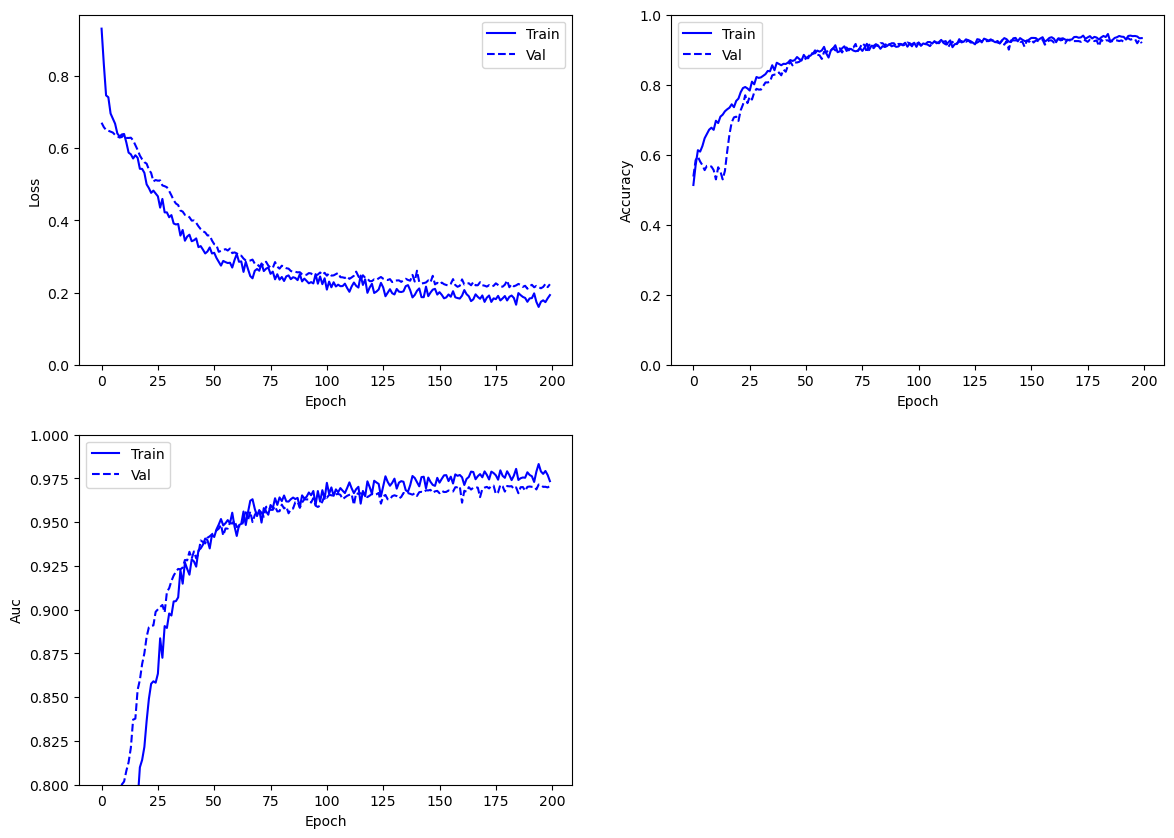

In [28]:
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'auc']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], 
                 color='b', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='b', linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

plt.rcParams['figure.figsize'] = (14,10)
plot_metrics(history)

As the number of Epoch grows, the training and validation error decreases and the ROC AUC increases. Our training is indeed effective.

Then we can use the model to predict the test set:

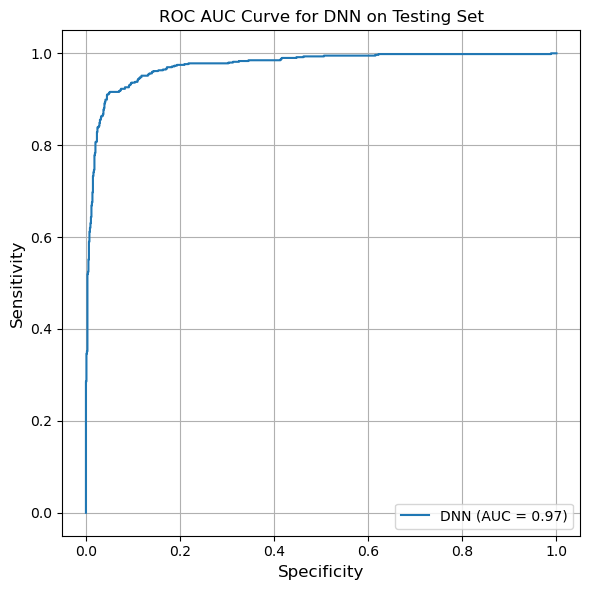

In [29]:
test_pred = model.predict(X_test, batch_size=BATCH_SIZE)
plt.rcParams['figure.figsize'] = (6,6)
RocCurveDisplay.from_predictions(y_test, test_pred, name = 'DNN')
plt.title("ROC AUC Curve for DNN on Testing Set")
plt.xlabel("Specificity", fontsize = 12)
plt.ylabel("Sensitivity", fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

Calculate classification error:

In [30]:
# RSS
test_error = np.mean((np.array(y_test)-test_pred)**2)
## sqrt(RSS/(n-2))
test_error_sd = np.mean(
    np.sqrt((np.array(y_test)-test_pred)**2/(X_test.shape[0]-2)))
print("The classification error on the test set is %.3f \
and the standard deviation is %.3f" % (test_error, test_error_sd))

The classification error on the test set is 0.061 and the standard deviation is 0.003


* The classification error on the test set of the DNN model ($0.061 \pm 0.003$) is better than that of the classification tree's, and it also gives a better classification rule for any loss with an area of 0.97 (0.97 > 0.95). 
* However, the as shown on Fig. 9.5, the pruned tree from the classification tree result can be easily interpreted. The DNN model is black-boxed, therefore it is lack of interpretability compared to the classification tree.